In [1]:
# USAGE
# python mask_rcnn_grabcut.py --mask-rcnn mask-rcnn-coco --image example.jpg
# import the necessary packages
import numpy as np
#import imutils
import cv2
#import os
import io
from google.colab import files
from matplotlib import pyplot as plt

In [2]:
# Read the mask_rcnn_inception_v2_coco_2018.pbtxt
mask_rcnn = "/content/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt"
file1 = open(mask_rcnn, "r")

In [3]:
#load the COCO class labels our Mask R-CNN was trained o
#uploaded = files.upload()
#labelsPath = os.path.sep.join([args["mask_rcnn"],"object_detection_classes_coco.txt"])
#LABELS = open(labelsPath).read().strip().split("\n")

# Read the object_detection_classes_coco.txt
classes_coco = "/content/object_detection_classes_coco.txt"
file1 = open(classes_coco, "r")

In [4]:
LABELS = open(classes_coco).read().strip().split("\n")

In [5]:
LABELS

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'street sign',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'hat',
 'backpack',
 'umbrella',
 'shoe',
 'eye glasses',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'plate',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'mirror',
 'dining table',
 'window',
 'desk',
 'toilet',
 'door',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'blender',
 'book',
 'clock',
 'vase',
 'scis

In [6]:
# initialize a list of colors to represent each possible class label
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),
	dtype="uint8")

In [7]:
COLORS

array([[102, 220, 225],
       [ 95, 179,  61],
       [234, 203,  92],
       [  3,  98, 243],
       [ 14, 149, 245],
       [ 46, 106, 244],
       [ 99, 187,  71],
       [212, 153, 199],
       [188, 174,  65],
       [153,  20,  44],
       [203, 152, 102],
       [214, 240,  39],
       [121,  24,  34],
       [114, 210,  65],
       [239,  39, 214],
       [244, 151,  25],
       [ 74, 145, 222],
       [ 14, 202,  85],
       [145, 117,  87],
       [184, 189, 221],
       [116, 237, 109],
       [ 85,  99, 172],
       [226, 153, 103],
       [235, 146,  36],
       [151,  62,  68],
       [181, 130, 160],
       [160, 166, 149],
       [  6,  69,   5],
       [ 52, 253, 112],
       [ 14,   1,   3],
       [ 76, 248,  87],
       [233, 212, 184],
       [235, 245,  26],
       [213, 157, 253],
       [ 68, 240,  37],
       [219,  91,  54],
       [129,   9,  51],
       [  0, 191,  20],
       [140,  46, 187],
       [147,   1, 254],
       [ 20, 153, 243],
       [ 46, 160

In [8]:
# derive the paths to the Mask R-CNN weights and model configuration
#weightsPath = os.path.sep.join([args["mask_rcnn"],"frozen_inference_graph.pb"])
#configPath = os.path.sep.join([args["mask_rcnn"],"mask_rcnn_inception_v2_coco_2018_01_28.pbtxt"])
configPath = "/content/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt"
config = open(configPath).read()

In [9]:
weightsPath = "/content/frozen_inference_graph.pb"
with open(weightsPath, 'rb') as w:
  weights = w.read()

In [10]:
# load our Mask R-CNN trained on the COCO dataset (90 classes)
# from disk
#print("[INFO] loading Mask R-CNN from disk...")
net = cv2.dnn.readNetFromTensorflow(weightsPath, configPath)

In [11]:
# load our input image from disk and display it to our screen
image = cv2.imread("/content/example.jpg")
dim = (600,375)
image = cv2.resize(image,dim,interpolation = cv2.INTER_AREA)
image.shape

(375, 600, 3)

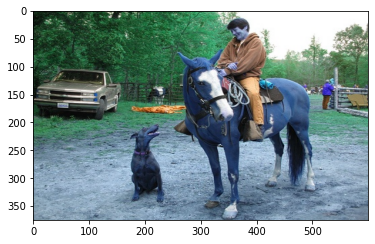

In [12]:
plt.imshow(image)
plt.show()

In [13]:
# construct a blob from the input image and then perform a
# forward pass of the Mask R-CNN, giving us (1) the bounding box
# coordinates of the objects in the image along with (2) the
# pixel-wise segmentation for each specific object
blob = cv2.dnn.blobFromImage(image, swapRB=True, crop=False)
net.setInput(blob)
(boxes, masks) = net.forward(["detection_out_final",
	"detection_masks"])

In [14]:
boxes.shape

(1, 1, 100, 7)

[INFO] showing output for 'horse'...


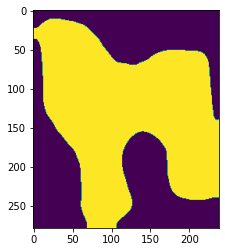

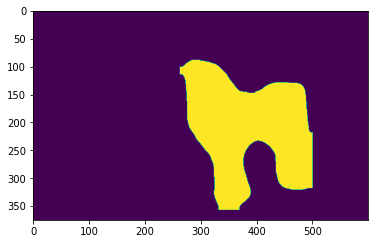

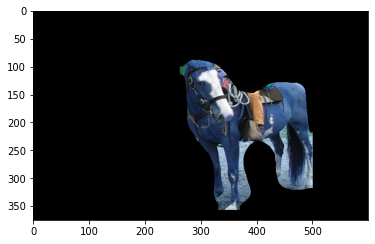

[INFO] applying GrabCut to 'horse' ROI...


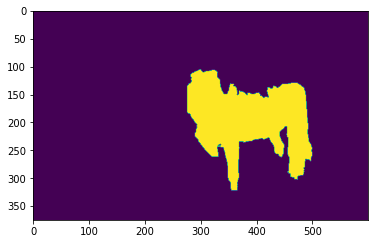

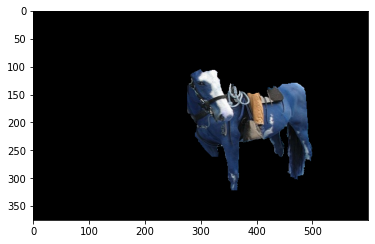

[INFO] showing output for 'person'...


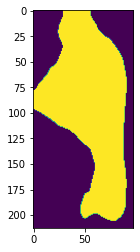

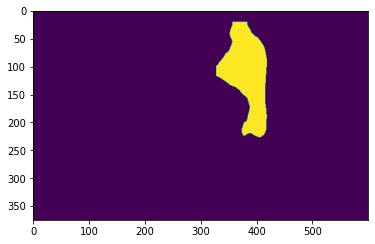

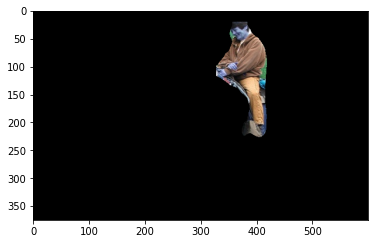

[INFO] applying GrabCut to 'person' ROI...


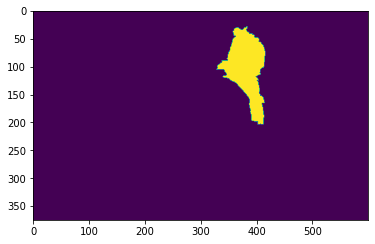

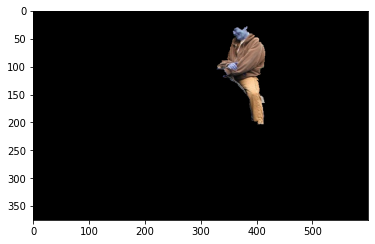

[INFO] showing output for 'dog'...


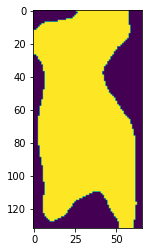

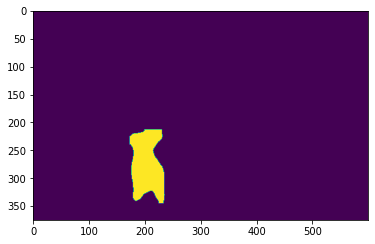

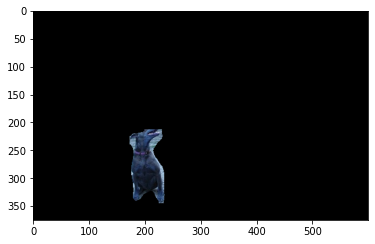

[INFO] applying GrabCut to 'dog' ROI...


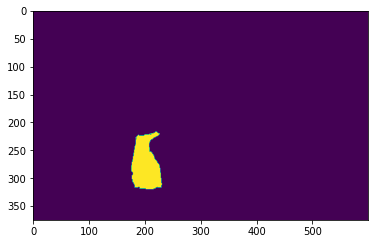

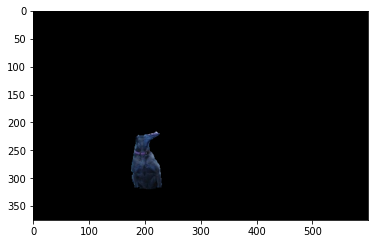

[INFO] showing output for 'person'...


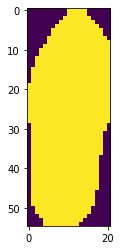

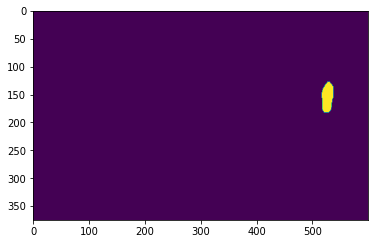

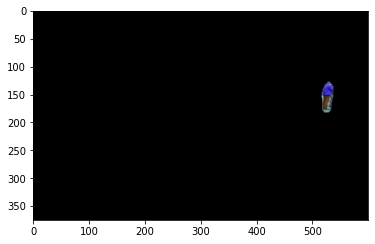

[INFO] applying GrabCut to 'person' ROI...


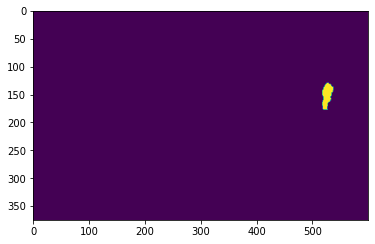

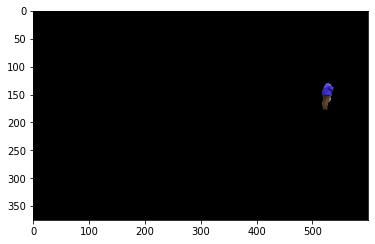

[INFO] showing output for 'car'...


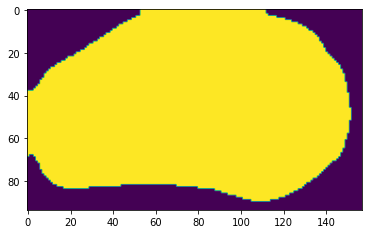

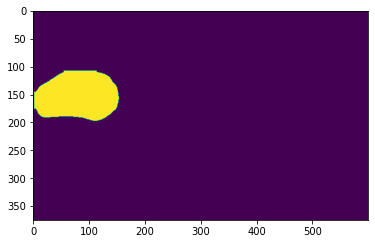

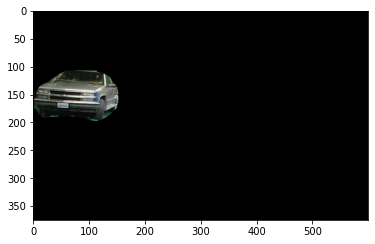

[INFO] applying GrabCut to 'car' ROI...


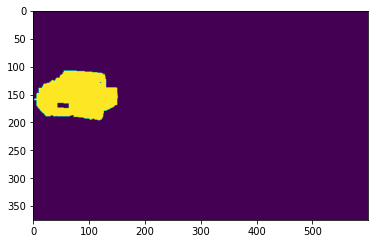

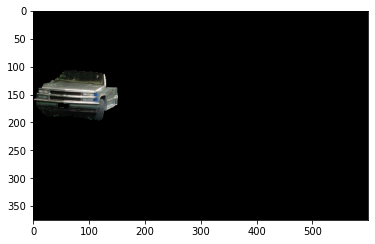

[INFO] showing output for 'cow'...


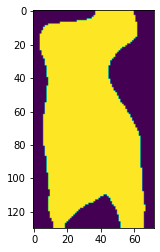

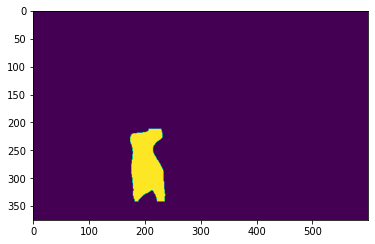

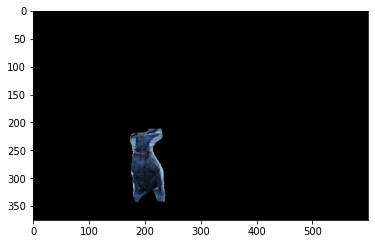

[INFO] applying GrabCut to 'cow' ROI...


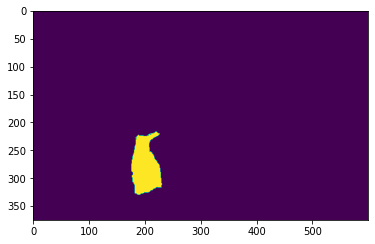

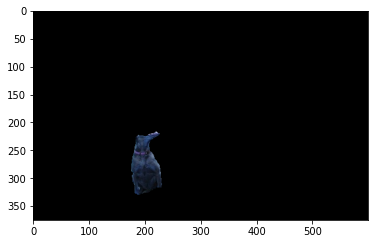

In [15]:
for i in range(0,  boxes.shape[2]):
  classID = int(boxes[0, 0, i, 1])
  confidence = boxes[0, 0, i, 2]
  if confidence > 0.5:
    print("[INFO] showing output for '{}'...".format(
			LABELS[classID]))
    (H, W) = image.shape[:2]
    box = boxes[0, 0, i, 3:7] * np.array([W, H, W, H])
    (startX, startY, endX, endY) = box.astype("int")
    boxW = endX - startX
    boxH = endY - startY
    mask = masks[i, classID]
    mask = cv2.resize(mask, (boxW, boxH),interpolation=cv2.INTER_CUBIC)
    mask = (mask > 0.3).astype("uint8") * 255
    plt.imshow(mask)
    plt.show()
    rcnnMask = np.zeros(image.shape[:2], dtype="uint8")
    rcnnMask[startY:endY, startX:endX] = mask
    rcnnOutput = cv2.bitwise_and(image, image, mask=rcnnMask)
    plt.imshow(rcnnMask)
    plt.show()
    plt.imshow(rcnnOutput)
    plt.show()
    
    gcMask = rcnnMask.copy()
    gcMask[gcMask > 0] = cv2.GC_PR_FGD
    gcMask[gcMask == 0] = cv2.GC_BGD
    print("[INFO] applying GrabCut to '{}' ROI...".format(LABELS[classID]))
    fgModel = np.zeros((1, 65), dtype="float")
    bgModel = np.zeros((1, 65), dtype="float")
    (gcMask, bgModel, fgModel) = cv2.grabCut(image, gcMask,
                                             None, bgModel, fgModel, iterCount=10,
                                             mode=cv2.GC_INIT_WITH_MASK)
    outputMask = np.where((gcMask == cv2.GC_BGD) | (gcMask == cv2.GC_PR_BGD), 0, 1)
    outputMask = (outputMask * 255).astype("uint8")
    output = cv2.bitwise_and(image, image, mask=outputMask)
    plt.imshow(outputMask)
    plt.show()
    plt.imshow(output)
    plt.show()